## **BOSTON CRIME RATE ANALYSIS**

***Step 1. Uploading the dataset into file***

In [ ]:
import pandas as pd
import numpy as np
import math
from google.colab import files
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import io
from sklearn.decomposition import PCA
import io
import missingno as msno
sns.set(style="darkgrid", font_scale=1.6, color_codes=True)
uploaded = files.upload()

Saving crime-incident-reports.csv to crime-incident-reports.csv


The dataset for the years 2015 to 2019 was downloaded individually from "Analyse Boston" site. 
Link : "https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system"

The merging of the dataset was done using Excel. The "Offense code group" for 2019 was missing. I added it using Excel with the help of "Offense cose group" for the year 2015 to 2018.


Here, the completed dataset was already uploaded directly so there will be no merging of datasets in this Colab file.

***Step 2 : Saving data into dataframe and metadata analysis***

In [ ]:
df = pd.read_csv('crime-incident-reports.csv')
df = df.assign(DAY_OF_YEAR=lambda x: pd.to_datetime(x.OCCURRED_ON_DATE).dt.day_of_year)
df = df.assign(WEEK_OF_YEAR=lambda x: pd.to_datetime(x.OCCURRED_ON_DATE).dt.isocalendar().week)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
def Info_df(dataframe):
    print("Shape-----------------------------")
    print(dataframe.shape)
    print("Null Values:----------------------")
    print(dataframe.isnull().sum())
  
Info_df(df)

Shape-----------------------------
(440437, 19)
Null Values:----------------------
INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 2868
REPORTING_AREA              0
SHOOTING               438172
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   97
STREET                  11207
Lat                     22530
Long                    22530
Location                    0
DAY_OF_YEAR                 0
WEEK_OF_YEAR                0
dtype: int64


Visualizing null values

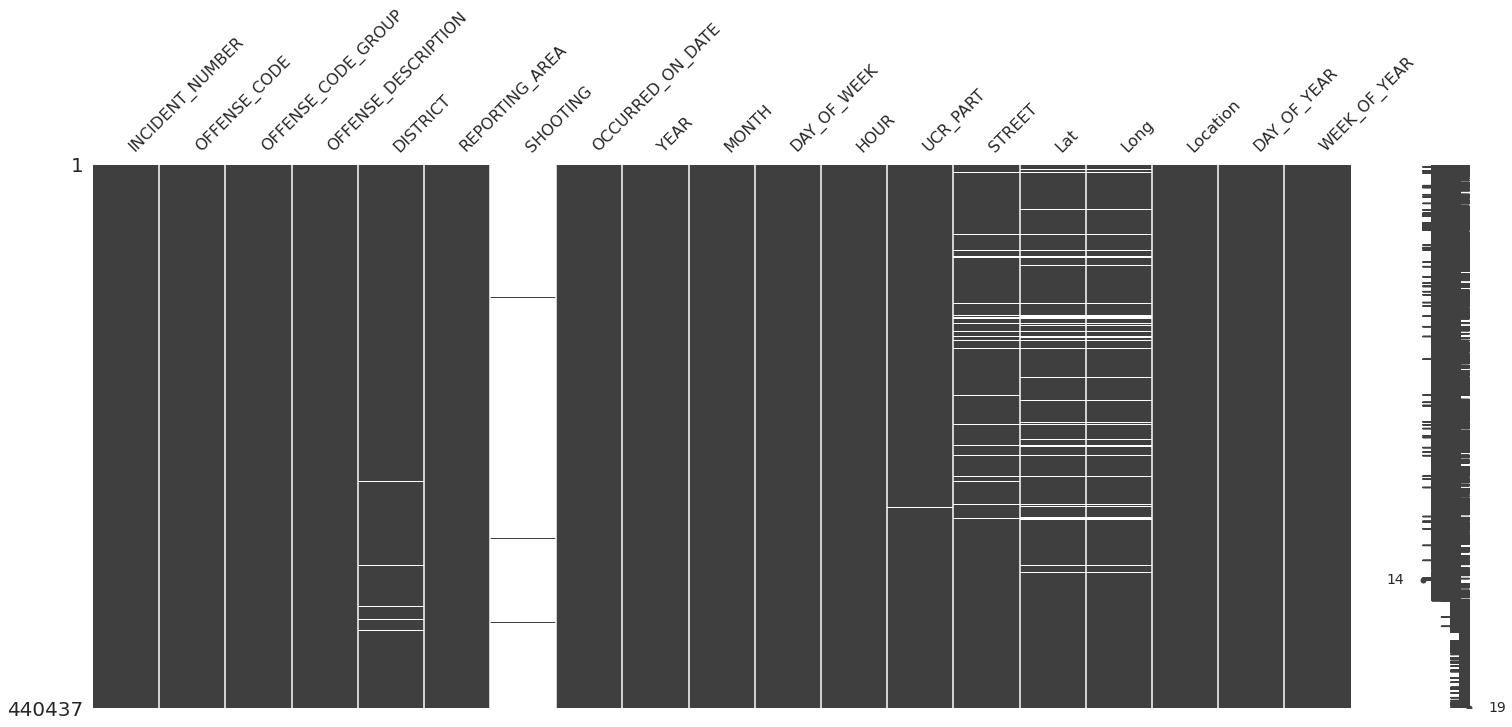

In [ ]:
msno.matrix(df)
plt.show()

***Step 3: Data Visualization***

### Viz 1 : Number of crimes per hour

Text(-10.888999999999989, 0.5, 'Count')

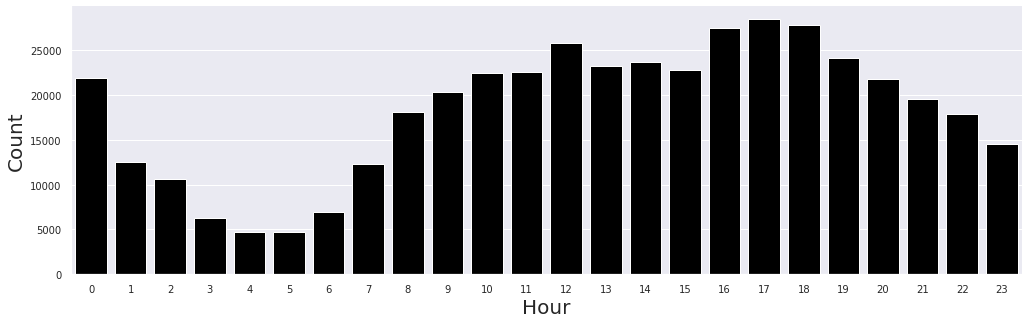

In [ ]:
sns.catplot(data= df ,
            x='HOUR',
           kind='count',
            color = 'black', 
            aspect=3)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Count', fontsize=20)

### Viz 2 : Number of crimes per day

Text(-11.013999999999989, 0.5, 'Count')

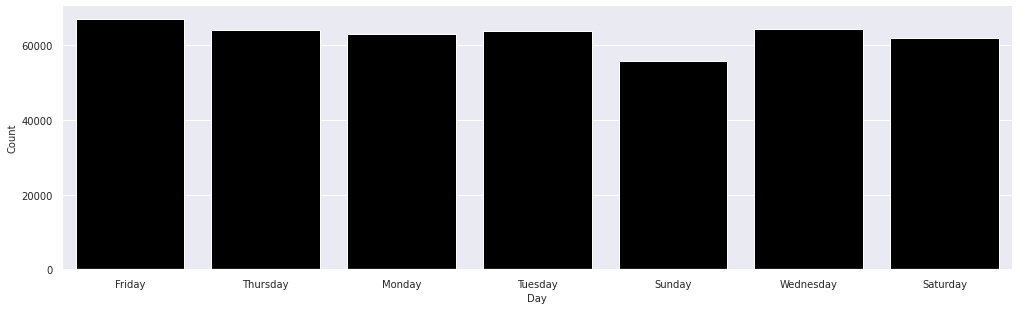

In [ ]:
sns.catplot(data=df,
            x='DAY_OF_WEEK',
           kind='count',
            color = 'black',  aspect=3)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Day', fontsize=10)
plt.ylabel('Count', fontsize=10)

### Viz 3: Number of crimes per month

Text(-10.888999999999996, 0.5, 'Count')

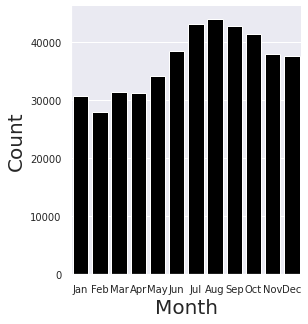

In [ ]:
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sns.catplot(data = df,
            x='MONTH',
           kind='count',
            color = 'black')
plt.xticks(np.arange(12), Months, size=10)
plt.yticks(size=10)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Count', fontsize=20)

Analysis for the 3 previous visualisations - 
Crimes rates are low between 1-8 am but there is a steady rise throughout the day, peaking around 6 pm. For days of the week, Friday has the highest crime rate while Sunday has the lowest crime rate. The winter months of February-April has the lowest crime rates whereas the summer/early fall months of June-October have the highest crime rates. 

### Viz 4 : Number of incidents per day per year

*Size of circle corresponds to the amount of shootings on that day*

*Crime peak observed between days 150 to 250*

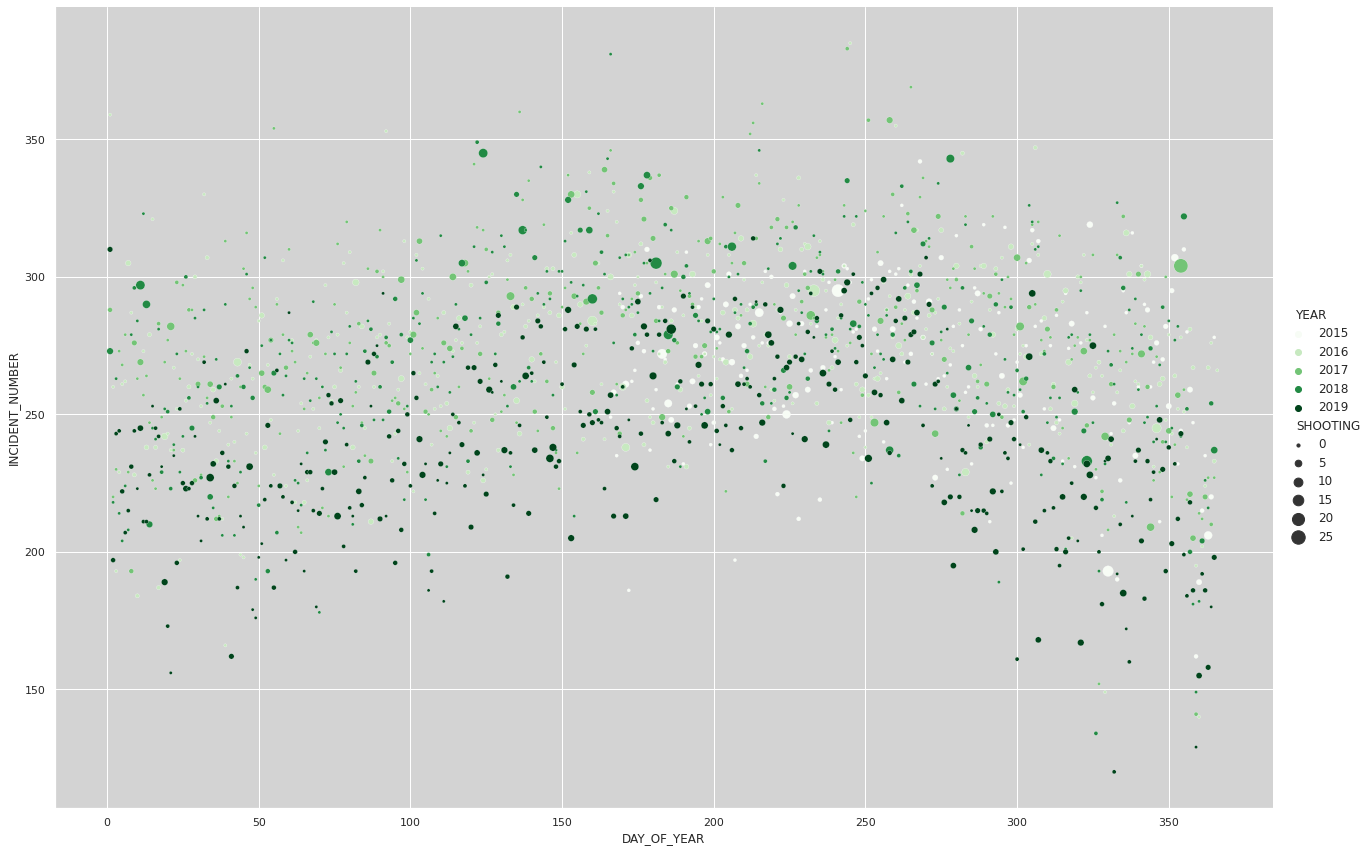

In [ ]:
df1 = df.groupby(['YEAR', 'DAY_OF_YEAR']).count()
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'white'})
g = sns.relplot(
    data=df1,
    x="DAY_OF_YEAR", y="INCIDENT_NUMBER",
    hue="YEAR", size="SHOOTING",
    palette="Greens", sizes=(10, 200),
    height = 12, aspect = 1.5
)

### Viz 5: Number of incidents per day per year

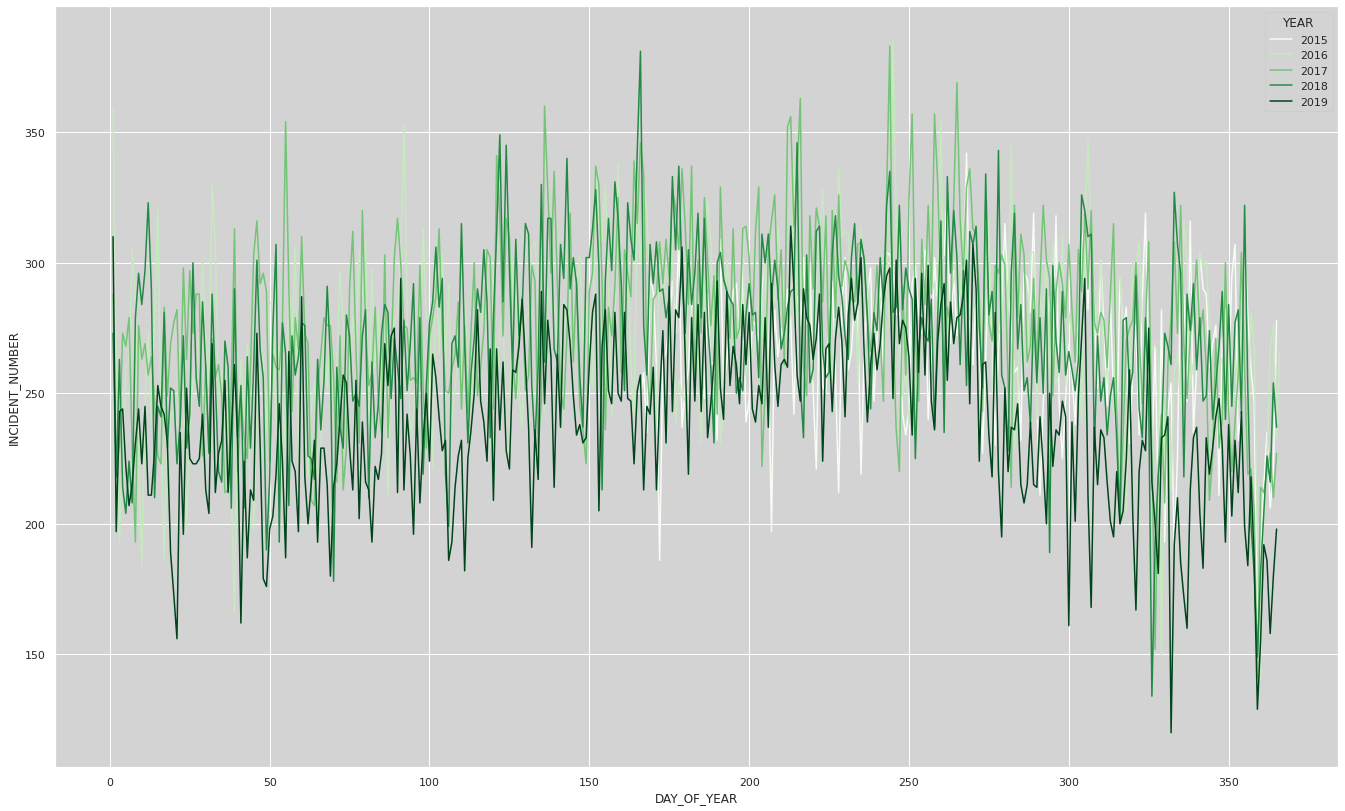

In [ ]:
sns.set(rc={'figure.figsize':(23,14),'axes.facecolor':'lightgrey', 'figure.facecolor':'white'})
g = sns.lineplot(
    data=df1,
    x="DAY_OF_YEAR", y="INCIDENT_NUMBER",
    hue="YEAR",
    palette="Greens"
)

### Viz 6: Number of severe(UCR Part One) offenses per year

*2015 has lower numbers because only data from last 6 months of the year is present*

*Larceny is by far the most frequently occuring serious crime followed by aggrivated assault. Serious crime rates seem to be dropping*

In [ ]:
df2 = df.loc[df['UCR_PART'] == 'Part One']
df2 = df2.groupby(['YEAR', 'OFFENSE_CODE_GROUP']).count()
df2 = df2.reset_index()
df2 = df2.astype({"YEAR": str})
alt.Chart(df2).mark_bar().encode(
    x=alt.Y('INCIDENT_NUMBER', axis=alt.Axis(title='# of Events')),
    y='YEAR',
    color='YEAR',
    row='OFFENSE_CODE_GROUP',
    tooltip=['YEAR', 'OFFENSE_CODE_GROUP', 'INCIDENT_NUMBER']
).properties(
    width=800,
    height=80
)

alt.Chart(...)

### Viz 7 : Number of severe incidents per year that involved shootings with shooting count below

*You can drag over the scatterplot to make selections*

*The most shootings occured in 2017*

In [ ]:
df3 = df.loc[df['UCR_PART'] == 'Part One']
df3 = df3.groupby(['YEAR', 'DAY_OF_YEAR','OFFENSE_CODE_GROUP']).count()
df3 = df3.reset_index()
df3 = df3.astype({"YEAR": str})
df3 = df3.loc[df3['SHOOTING'] > 0]
brush = alt.selection(type='interval')

points = alt.Chart(df3).mark_point().encode(
    x='DAY_OF_YEAR',
    y='INCIDENT_NUMBER',
    color=alt.condition(brush, 'OFFENSE_CODE_GROUP', alt.value('lightgray')),
    tooltip=['YEAR', 'DAY_OF_YEAR', 'OFFENSE_CODE_GROUP', 'INCIDENT_NUMBER', 'SHOOTING']
).add_selection(
    brush
).properties(
    width=1750,
    height=500
)

bars = alt.Chart(df3).mark_bar().encode(
    y='YEAR',
    color='YEAR',
    x=alt.X('count(SHOOTING):Q', axis=alt.Axis(title='# of Shootings'))
).transform_filter(
    brush
).properties(
    width=1000,
    height=200
)

points & bars

alt.VConcatChart(...)

### Viz 8: Scatterplot of incident count per week of districts with crime rates above the median

*Circle size corresponds to the amount of shootings*

*A1 - Downtown & Charleston*
*B2 - Roxbury*
*B3 - Mattapan*
*C11 - Dorchester*
*C6 - South Boston*
*D4 - South End*

*Most shootings occur in Roxbury, Dorchester, and Mattapan. These areas also have high rates of severe crime*

In [ ]:
df4 = df.loc[df['UCR_PART'] == 'Part One']
df4 = df4.groupby(['YEAR', 'WEEK_OF_YEAR', 'DISTRICT']).count()
df4 = df4.reset_index()
df4 = df4.astype({"YEAR": str, "SHOOTING" : int})
df4 = df4.loc[df4['DISTRICT'] != 'External']
df4['INCIDENT_NUMBER'].median()
count = 0
median = df4['INCIDENT_NUMBER'].median()
for x in df4['DISTRICT'].unique():
  z = df4[df4['DISTRICT'] == x]
  if z['INCIDENT_NUMBER'].mean() < median:
    df4 = df4.loc[df4['DISTRICT'] != x]
    count += 1
  else:
    count += 1
df4 = df4.reset_index()
df4 = df4.drop(columns='index')
base = alt.Chart(df4).mark_circle().encode(
    x='WEEK_OF_YEAR',
    y='INCIDENT_NUMBER',
    color=alt.Color('DISTRICT', scale=alt.Scale(scheme='tableau10')),
    size=alt.Size('SHOOTING:Q', scale=alt.Scale(range=[30, 500])),
    tooltip=['YEAR', 'DISTRICT', 'INCIDENT_NUMBER', 'SHOOTING', 'WEEK_OF_YEAR']
).properties(
    width=1000,
    height=800
)
base + base.transform_loess('WEEK_OF_YEAR','INCIDENT_NUMBER', groupby=['DISTRICT']).mark_line()

alt.LayerChart(...)

### Viz 9: Heatmap of severe crimes

*Downtown Boston and Back Bay are hotspots*

In [ ]:
n = folium.Map(location=[42.361145, -71.057083], zoom_start = 12, min_zoom=12)
pt1_df = df.loc[df['UCR_PART'] == 'Part One']
pt1_df = pt1_df.dropna(subset=['Lat', 'Long'])
pt1_df = pt1_df.reset_index()
pt1_df = pt1_df.drop(columns='index')
heat_data = [[row['Lat'],row['Long']] for index, row in pt1_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(n)
n

Shooting heatmap

*Roxbury, Dorchester, and Mattapan are shooting hotspots*

In [ ]:
df5 = df.loc[df['UCR_PART'] == 'Part One']
df5 = df5.groupby(['YEAR', 'WEEK_OF_YEAR', 'DISTRICT']).count()
df5 = df5.reset_index()
df5 = df5.astype({"YEAR": str, "SHOOTING" : int})
df5 = df5.loc[df5['DISTRICT'] != 'External']
m = folium.Map(location=[42.361145, -71.057083], zoom_start = 12, min_zoom=12)
shooting_df = df.loc[pd.notna(df["SHOOTING"])]
shooting_df = shooting_df.dropna(subset=['Lat', 'Long'])
shooting_df = shooting_df.reset_index()
shooting_df = shooting_df.drop(columns='index')
heat_data = [[row['Lat'],row['Long']] for index, row in shooting_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(m)
m

***Step 4: Predictive Modeling Using Machine Learning Algorithms***

Transforming labels to string type so that it can be used for further operations.

In [ ]:
transform_labels=df.iloc[:,:]
transform_labels.loc[:,'STREET']=LabelEncoder().fit_transform(transform_labels.loc[:,'STREET'].astype('str'))
transform_labels.loc[:,'DISTRICT']=LabelEncoder().fit_transform(transform_labels.loc[:,'DISTRICT'].astype('str'))
transform_labels.loc[:,'REPORTING_AREA']=LabelEncoder().fit_transform(transform_labels.loc[:,'REPORTING_AREA'].astype('str'))
transform_labels.loc[:,'DAY_OF_WEEK']=LabelEncoder().fit_transform(transform_labels.loc[:,'DAY_OF_WEEK'])
transform_labels.loc[:,'STREET']=LabelEncoder().fit_transform(transform_labels.loc[:,'STREET'].astype('str'))
transform_labels.loc[:,'UCR_PART']=LabelEncoder().fit_transform(transform_labels.loc[:,'UCR_PART'].astype('str'))
transform_labels.loc[:,'OFFENSE_CODE_GROUP']=LabelEncoder().fit_transform(transform_labels.loc[:,'OFFENSE_CODE_GROUP'])
transform_labels.loc[:,'OFFENSE_DESCRIPTION']=LabelEncoder().fit_transform(transform_labels.loc[:,'OFFENSE_DESCRIPTION'])
transform_labels.loc[:,'DISTRICT']=LabelEncoder().fit_transform(transform_labels.loc[:,'DISTRICT'].astype('str'))
transform_labels.loc[:,'REPORTING_AREA']=LabelEncoder().fit_transform(transform_labels.loc[:,'REPORTING_AREA'].astype('str'))
transform_labels.loc[:,'SHOOTING']=LabelEncoder().fit_transform(transform_labels.loc[:,'SHOOTING'])
transform_labels.loc[:,'DAY_OF_WEEK']=LabelEncoder().fit_transform(transform_labels.loc[:,'DAY_OF_WEEK'])

transform_labels

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  OFFENSE_DESCRIPTION  \
0           I192068249          2647                  46                  272   
1           I192061894          1106                  11                  114   
2           I192038828          1107                  22                  117   
3           I192008877          1107                  22                  117   
4           I182090828          1102                  22                  116   
...                ...           ...                 ...                  ...   
440432       192078631           400                   0                  191   
440433       192078608           800                  61                  192   
440434       192078606          3300                  46                  210   
440435       192078634          3300                  46                  210   
440436       192078648          3100                  32                  204   

        DISTRICT  REPORTING_AREA  SHOOTING OCCURRED_ON_DATE  YEAR  MONTH  \
0              7             116         1    8/28/15 10:20  2015      8   
1              9             208         1     8/20/15 0:00  2015      8   
2              0             812         1    11/2/15 12:24  2015     11   
3              2             416         1    7/31/15 10:00  2015      7   
4             12             645         1    12/1/15 12:00  2015     12   
...          ...             ...       ...              ...   ...    ...   
440432         6               0         1     9/29/19 1:30  2019      9   
440433         2               0         1     9/29/19 1:35  2019      9   
440434        10               0         1     9/29/19 2:21  2019      9   
440435         8               0         1     9/29/19 4:27  2019      9   
440436         8               0         1     9/29/19 6:39  2019      9   

        DAY_OF_WEEK  HOUR  UCR_PART  STREET        Lat       Long  \
0                 0    10         3    6266  42.330119 -71.084251   
1                 4     0         3     542  42.300605 -71.061268   
2                 1    12         3    2591  42.334288 -71.072395   
3                 0    10         3    6613  42.237009 -71.129566   
4                 5    12         3    5998  42.342432 -71.072258   
...             ...   ...       ...     ...        ...        ...   
440432            3     1         0    6861  42.390271 -70.996769   
440433            3     1         0     365  42.278688 -71.117344   
440434            3     2         0    6085  42.341287 -71.054679   
440435            3     4         0    1985  42.278922 -71.094995   
440436            3     6         0    6587  42.277964 -71.092463   

                           Location  DAY_OF_YEAR  WEEK_OF_YEAR  
0       (42.33011862, -71.08425106)          240            35  
1       (42.30060543, -71.06126785)          232            34  
2       (42.33428841, -71.07239518)          306            45  
3       (42.23700950, -71.12956606)          212            31  
4       (42.34243222, -71.07225766)          335            49  
...                             ...          ...           ...  
440432                       (0, 0)          272            39  
440433                       (0, 0)          272            39  
440434                       (0, 0)          272            39  
440435                       (0, 0)          272            39  
440436                       (0, 0)          272            39  

[440437 rows x 19 columns]

In [ ]:
data_clean = transform_labels.dropna()
train_data = data_clean.loc[data_clean['YEAR'].isin([2015,2016,2017,2018])]
test_data = data_clean.loc[data_clean['YEAR'] == 2019]
print(len(train_data))
print(len(test_data))

330723
87184


In [ ]:
features_train = train_data[['DISTRICT','OFFENSE_CODE_GROUP','MONTH','DAY_OF_WEEK','HOUR','Lat','Long']]
target_train = train_data[['REPORTING_AREA']]
features_test = test_data[['DISTRICT', "OFFENSE_CODE_GROUP",'MONTH','DAY_OF_WEEK','HOUR','Lat','Long']]
target_test = test_data[['REPORTING_AREA']]

# **Decision Tree Model**

In [ ]:
clf = tree.DecisionTreeClassifier()

clf = clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)

*Accuracy predicting individual reporting areas*

In [ ]:
rep = classification_report(target_test, target_pred)
print(rep)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.64      0.27      0.38      7712
           1       0.00      0.00      0.00         2
           2       0.35      0.59      0.44        69
           3       0.61      0.67      0.64        46
           4       0.78      0.58      0.67        31
           5       0.73      0.85      0.79        75
           6       0.00      0.00      0.00         2
           7       0.38      0.56      0.45        36
           8       0.86      0.78      0.82        41
           9       0.94      0.94      0.94        81
          10       0.80      0.77      0.79        57
          11       0.85      0.93      0.89        30
          12       0.55      0.50      0.52        12
          13       0.83      0.86      0.84        22
          14       0.85      0.68      0.76        25
          15       0.71      0.83      0.77        54
          16       0.68      0.85      0.76        40
          17       0.74    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*Decision Tree Model Accuracy*

In [ ]:
print("Accuracy: ", accuracy_score(target_test, target_pred))

Accuracy:  0.7227128830978161


# **Random Forest Model and Accuracy**

In [ ]:
clf2 = RandomForestClassifier(n_estimators=4)

clf2 = clf2.fit(features_train, target_train)

In [ ]:
target_pred = clf2.predict(features_test)
print("Accuracy: ", accuracy_score(target_test, target_pred))

Accuracy:  0.5727197650945127


**Conclusion** - Surprising that random forest performed worse than the decision tree.  Both models did not perform ideally. We were limited by processing power of our personal machines. Increasing the number of trees in the random forest model can slightly improve the accuracy but this is at the expense of time and memory consumed in processing(we were short on both!).
Apply another method to make improved predictive model(possibly a neural network).
This would be possible if we could incorporate demographic information into visualizations.
Other information is likely necessary to build an accurate model.

